mae: 0.10
R^2 Score: 0.42


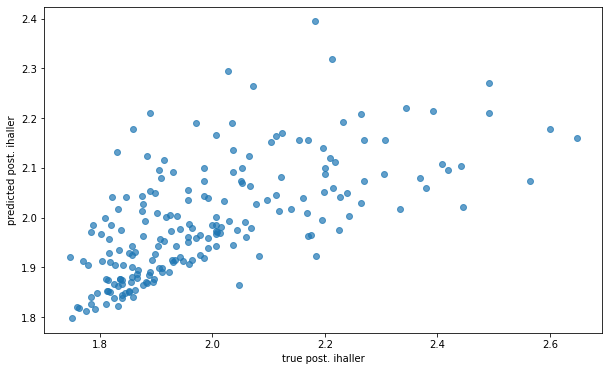

CPU times: total: 15.6 ms
Wall time: 280 ms


In [7]:
%%time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

data_path = 'results/haller_index.csv'
data = pd.read_csv(data_path)

if data.isna().any().any():
	data.fillna(data.mean(), inplace=True)

if np.isinf(data.values).any():
	data.replace([np.inf, -np.inf], np.nan, inplace=True)
	data.fillna(data.mean(), inplace=True)  

X = data['pre_haller']
y = data['post_haller']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test = X_train.values.reshape(-1, 1), X_test.values.reshape(-1, 1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

history = model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mae: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('true post. ihaller')
plt.ylabel('predicted post. ihaller')
plt.show()


7/7 [==============================] - 0s 2ms/step
mae: 0.11
R^2 Score: 0.41


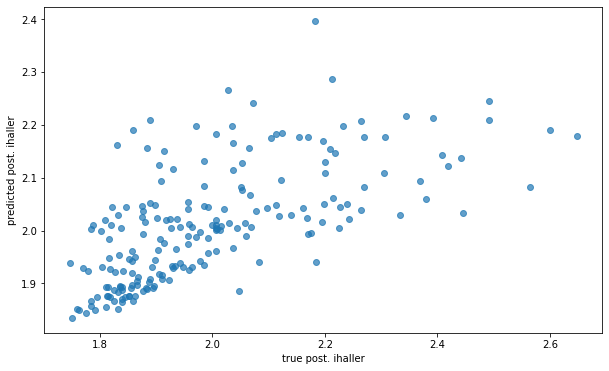

CPU times: total: 828 ms
Wall time: 5.88 s


In [16]:
%%time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
import matplotlib.pyplot as plt

data_path = 'results/haller_index.csv'
data = pd.read_csv(data_path)
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

X = data['pre_haller']
y = data['post_haller']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test = X_train.values.reshape(-1, 1), X_test.values.reshape(-1, 1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
	tf.keras.layers.Dense(64, activation='relu'),  # First hidden layer with 64 neurons and ReLU activation
	tf.keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
	tf.keras.layers.Dense(32, activation='relu'),  # Second hidden layer with 32 neurons and ReLU activation
	tf.keras.layers.Dense(1)  # Output layer
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjusted learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Implement early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Split the data to include a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Train the model with validation data and early stopping
history = model.fit(X_train, y_train, epochs=1000, verbose=0, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Continue with the prediction and evaluation as before

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mae: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('true post. ihaller')
plt.ylabel('predicted post. ihaller')
plt.show()


In [17]:
import joblib
joblib.dump(model, 'model.pkl')



['model.pkl']